In [1]:
!pip install pandas scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [5]:
print("Dataset Overview:")
print(df.head())
print("\nClass Distribution:")
print(df['label'].value_counts())

Dataset Overview:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


<ipython-input-6-5b99c9803d9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='pastel')


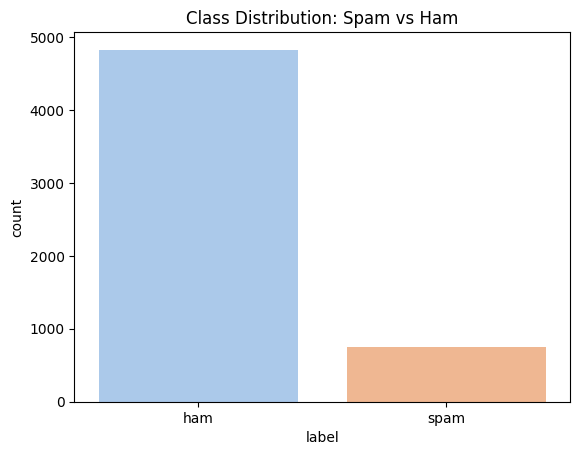

In [6]:
# Visualize class distribution
sns.countplot(data=df, x='label', palette='pastel')
plt.title("Class Distribution: Spam vs Ham")
plt.show()

In [7]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.3, random_state=42, stratify=df['label']

SyntaxError: incomplete input (<ipython-input-8-4b9b18f43828>, line 3)

In [9]:
vX_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.3, random_state=42, stratify=df['label']
)

In [10]:
# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

NameError: name 'X_train' is not defined

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.3, random_state=42, stratify=df['label']
)
# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# Train the Naïve Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test_vec)

In [14]:
# Evaluate the model's performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9844497607655502

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.95      0.93      0.94       224

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.97      1672
weighted avg       0.98      0.98      0.98      1672



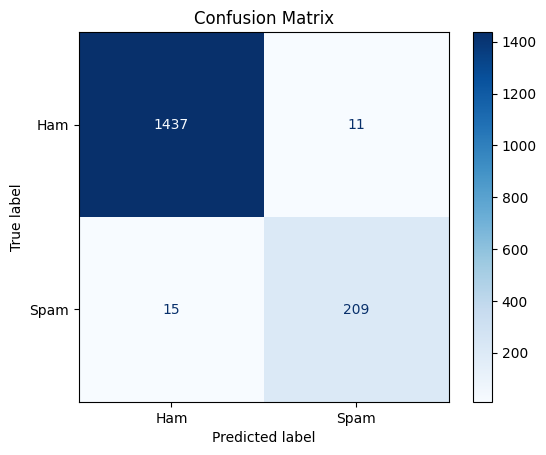

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Ham', 'Spam'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Analyze most predictive words for spam detection (optional)
feature_names = vectorizer.get_feature_names_out()
spam_word_probs = model.feature_log_prob_[1]

In [17]:
top_spam_words = np.argsort(spam_word_probs)[-10:]  # Top 10 spam-indicative words

In [18]:
print("\nTop Predictive Words for Spam Detection:")
for idx in top_spam_words:
    print(f"{feature_names[idx]}: {np.exp(spam_word_probs[idx]):.4f}")


Top Predictive Words for Spam Detection:
prize: 0.0038
www: 0.0049
mobile: 0.0051
reply: 0.0051
claim: 0.0052
text: 0.0059
stop: 0.0059
ur: 0.0070
txt: 0.0079
free: 0.0110
